<a href="https://colab.research.google.com/github/aghosh92/polar_organic/blob/main/Notebook_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook shows an example how to build a ML regression model with random forest algorithm for datasets on organic ferroelectric compounds.
[Paper link](https://arxiv.org/abs/2108.13206)




### Author: Ayana Ghosh

Email: research.aghosh@gmail.com

Install packages

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7045d6a3c72652b8800608c88deffea1965b03ea37b75fb653255f30f09624a7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Import essential libraries

In [2]:
import wget
import pandas as pd
import numpy as np
import plotly.express as px
from pandas import json_normalize
from scipy import stats as st
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
import json
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from IPython.display import Image
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, r2_score

Read in the Data (.csv files)

In [3]:
!wget -O data_sampled_combined.csv https://www.dropbox.com/scl/fi/50a87z2l7gu96ui5xxtf7/data_sampled_combined.csv?rlkey=q64ovrdiyfhalz13q68uemsmy&dl=0
!wget -O data_original_compounds.csv https://www.dropbox.com/scl/fi/2h95hijm85jna1w6f8f20/data_original_compounds.csv?rlkey=bqgsu78u0t2csznaf2lwmfhyp&dl=0

filename0 = 'data_sampled_combined.csv'
filename1 = 'data_original_compounds.csv'

df_sampled = pd.read_csv(filename0)
df_original = pd.read_csv(filename1)

--2023-10-11 18:28:08--  https://www.dropbox.com/scl/fi/50a87z2l7gu96ui5xxtf7/data_sampled_combined.csv?rlkey=q64ovrdiyfhalz13q68uemsmy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc644a72f8dee76115d6a7dd4c07.dl.dropboxusercontent.com/cd/0/inline/CFbeJoAB0ckNzwRst_egnzSYC25_4Re7Q-hXzpkrIcaPlWedZJZy6KqyO5-PVsqlkzps8W5TupvTXFkyeCO8uW_BMhzRUUZbeFn1zXpk0XXTdU9f2QyQjXVFEEON65twJaklJumcZE9gDZgtEiBy3u5Q/file# [following]
--2023-10-11 18:28:09--  https://uc644a72f8dee76115d6a7dd4c07.dl.dropboxusercontent.com/cd/0/inline/CFbeJoAB0ckNzwRst_egnzSYC25_4Re7Q-hXzpkrIcaPlWedZJZy6KqyO5-PVsqlkzps8W5TupvTXFkyeCO8uW_BMhzRUUZbeFn1zXpk0XXTdU9f2QyQjXVFEEON65twJaklJumcZE9gDZgtEiBy3u5Q/file
Resolving uc644a72f8dee76115d6a7dd4c07.dl.dropboxusercontent.com (uc644a72f8dee76115d6a7dd4c07.dl.dropboxusercontent.com)... 162.125

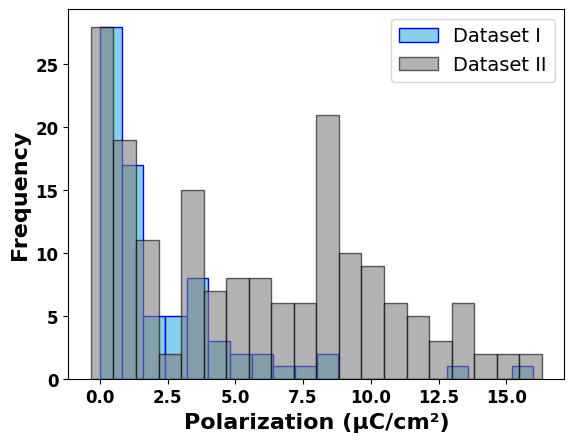

In [4]:

# Plot histograms
df_original['polarization'].hist(bins=20, label='Dataset I', color = "skyblue",ec="blue")
df_sampled['polarization'].hist(alpha=0.6, bins=20, label='Dataset II',color='grey',ec="black")

# Customize plot
plt.legend(fontsize=14)
#plt.title('Histogram of Variables 1 and 2')
plt.xlabel("Polarization (µC/cm\u00b2)",fontdict={'fontsize' : 16}, fontweight = "bold")
plt.ylabel("Frequency",fontdict={'fontsize' : 16}, fontweight = "bold")
plt.grid(False)
plt.xticks(fontsize = 12, weight = "bold")
plt.yticks(fontsize = 12, weight = "bold")
# Show plot
plt.show()

## We shall utilize the sampled dataset for training and the testing will be performed on the original set of compounds.

In [50]:
#setting up the X and y for training and test
endpoint = 'polarization'

X = df_sampled.loc[:,df_sampled.columns != endpoint]
y  = df_sampled['polarization']

In [31]:
# @title Grid-search and feature importance block
# Please uncomment this block to perform grid-search optimization and perform feature importance which takes long time to run


#setting up the hyperparams for optimizing via randomized grid search

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 20)]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(2, 10, num = 10)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 3, 4]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True,False]
# # Create the random grid
# tuned_parameters = {'n_estimators': n_estimators,'max_depth': max_depth,
#                 'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

# forest = GridSearchCV(ExtraTreesRegressor(random_state=1),tuned_parameters,verbose=10,cv=10,n_jobs=5)#,scoring=scores)

# forest.fit(X_train,y_train)
# print("Best parameters set found on development set:")
# print()

#use best hyperparams and determine feature importance
# params = dict(forest.best_params_)
# forest_imp = ExtraTreesRegressor(**params)
# forest_imp.fit(X_train,y_train)

# importances = forest_imp.feature_importances_

# std = np.std([tree.feature_importances_ for tree in forest_imp.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# #These are the top n most important features...
# print("Feature ranking:")
# features = X_train_z.columns
# ranked_features=[]
# importances_feat = []
# n_features = 10
# for f in range(n_features):#X.shape[1]):
#   ranked_features.append(features[indices[f]])
#   importances_feat.append(importances[indices[f]])
#   print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

## Here we show an example how to produce a model which utilizes the optimized hyperparameters and 10 most important features as listed in the paper.

In [109]:
feat_list_imp = ['MagpieData mean NdUnfilled', 'MagpieData minimum GSbandgap', 'vpa',
                 'MagpieData range Row', 'MagpieData avg_dev NUnfilled',
                 'MagpieData avg_dev NpUnfilled', 'MagpieData mean Electronegativity', 'MagpieData avg_dev NpValence',
                 'MagpieData avg_dev NdValence','packing fraction']
X_select = X[feat_list_imp]

In [218]:
#train test split 0.8/0.2
mae_test = []
rmse_test = []
r2_test = []
mae_train = []
rmse_train =[]
r2_train = []
pred = []

for i in range(500):

  X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2,random_state=42,shuffle=True)

  forest = ExtraTreesRegressor(n_estimators=13,min_samples_split=2,
                             min_samples_leaf=1,bootstrap=True)
  forest.fit(X_train,y_train)
  importances = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
  indices = np.argsort(importances)[::-1]
  #predict on train
  model_train=forest.predict(X_train)

  #dropping columns from dataframe
  df = df_original.drop(columns=["structures"], axis=1)
  #setting up the X and y for training and test
  endpoint = 'polarization'

  X_orig = df.loc[:,df.columns != endpoint]
  X_orig = X_orig[feat_list_imp]
  y_orig  = df['polarization']
  y_test_orig = y_orig.to_numpy()
  label_test_orig = y_test_orig.tolist()
  #predict on actual dataset
  model_test_orig=forest.predict(X_orig)

  mae_test.append(mean_absolute_error(model_test_orig, y_test_orig))
  rmse_test.append(mean_squared_error(model_test_orig, y_test_orig,squared=False))
  r2_test.append(r2_score(model_test_orig, y_test_orig))
  mae_train.append(mean_absolute_error(model_train, y_train))
  rmse_train.append(mean_squared_error(model_train, y_train))
  r2_train.append(r2_score(model_train, y_train))
  pred.append(model_test_orig)

In [216]:
mae_tr_avg = np.average(mae_train)
rmse_tr_avg = np.average(rmse_train)
r2_tr_avg = np.average(r2_train)

mae_test_avg = np.average(mae_test)
rmse_test_avg = np.average(rmse_test)
r2_test_avg = np.average(r2_test)

In [217]:
print("Average Mean absolute error train: %.3f" %mae_tr_avg)
print("Average RMSE train: %.3f" %rmse_tr_avg)
print("R^2 train: %.3f" %r2_tr_avg)

print("Average Mean absolute error test: %.3f" %mae_test_avg)
print("Average RMSE test: %.3f" %rmse_test_avg)
print("R^2 test: %.3f" %r2_test_avg)

Average Mean absolute error train: 0.695
Average RMSE train: 1.024
R^2 train: 0.938
Average Mean absolute error test: 0.958
Average RMSE test: 1.393
R^2 test: 0.676


Parity plot using the averaged result

In [220]:
pred_avg = np.average(pred, axis=0)

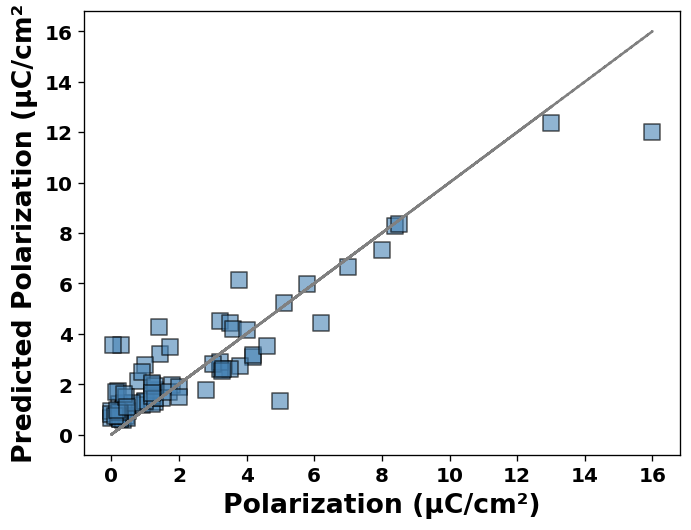

In [224]:
#plot prediction versus ground truth
plt.figure(dpi=120)
s= 90
a = 0.6
plt.plot(y_test_orig, y_test_orig,'--', c='grey',)

plt.scatter(y_test_orig, pred_avg, edgecolor='black', c="steelblue", marker="s", s=s, alpha=a)
plt.xlabel("Polarization (µC/cm\u00b2)",fontdict={'fontsize' : 16}, fontweight = "bold")
plt.ylabel("Predicted Polarization (µC/cm\u00b2",fontdict={'fontsize' : 16}, fontweight = "bold")
#plt.xlim(-0.1,18)
plt.xticks(fontsize = 12, weight = "bold")
plt.yticks(fontsize = 12, weight = "bold")
plt.show()